In [1]:
# Import necessary libraries
%pip install bioinfokit
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

# Data loading

In [2]:
# Use the upload method to upload the data file
uploaded = files.upload()

data_path = 'INF2178_A3_data.csv'

# Load the dataset
data = pd.read_csv(data_path)

Saving INF2178_A3_data.csv to INF2178_A3_data (2).csv


# Data preparation

In [3]:
# Display the first few rows of the dataset and its summary
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


(None,
    fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
 0             36.58          39.54                     33.822   
 1             50.82          44.44                     38.147   
 2             40.68          28.57                     28.108   
 3             32.57          23.57                     15.404   
 4             31.98          19.65                     18.727   
 
    springreadingscore  springmathscore  springgeneralknowledgescore  \
 0               49.37            50.10                       40.533   
 1               83.50            58.93                       37.409   
 2               40.41            32.81                       29.312   
 3               34.14            35.25                       27.382   
 4               32.84            23.60                       26.977   
 
    totalhouseholdincome  incomeinthousands  incomegroup  
 0              140000.0              140.0            3  
 1              120000.0              120.0

In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

# Data exploration(EDA)

In [5]:
data.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


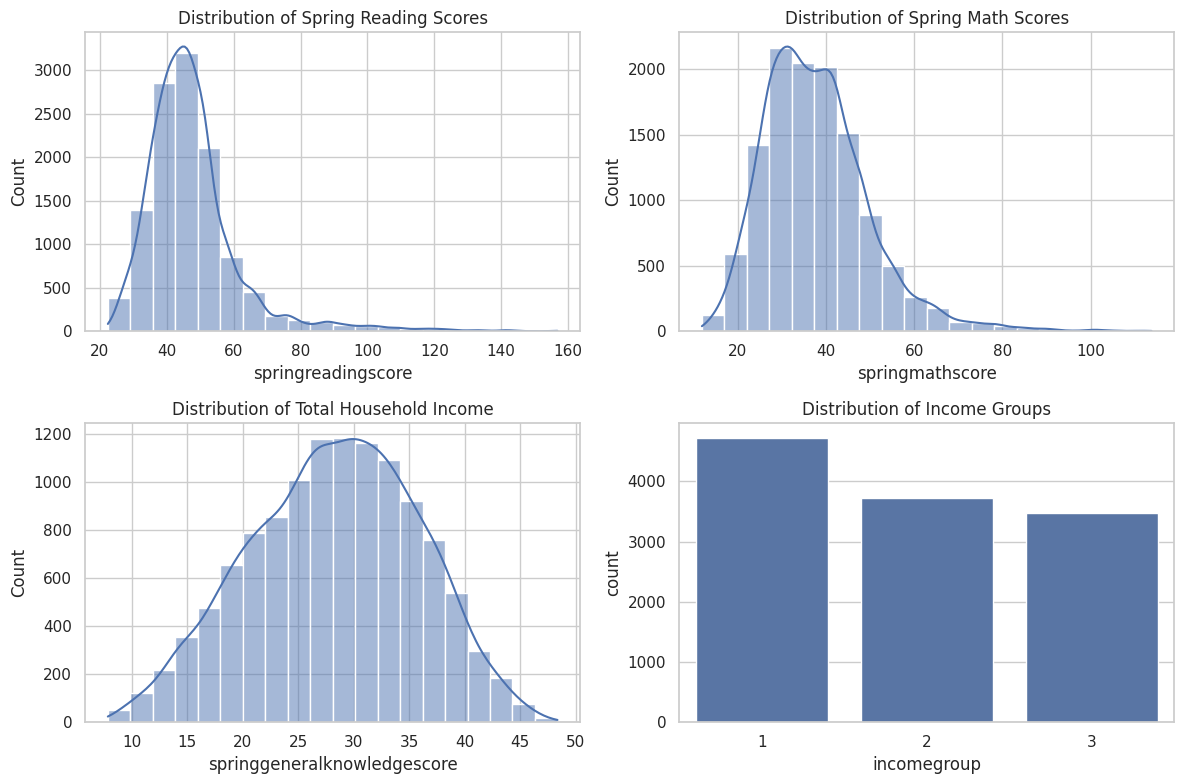

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization of interested variables
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot distributions of scores and income
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['springreadingscore'], kde=True, bins=20)
plt.title('Distribution of Spring Reading Scores')

plt.subplot(2, 2, 2)
sns.histplot(data['springmathscore'], kde=True, bins=20)
plt.title('Distribution of Spring Math Scores')

plt.subplot(2, 2, 3)
sns.histplot(data['springgeneralknowledgescore'], kde=True, bins=20)
plt.title('Distribution of Total Household Income')

plt.subplot(2, 2, 4)
sns.countplot(x='incomegroup', data=data)
plt.title('Distribution of Income Groups')

plt.tight_layout()
plt.show()

# Interpretation of Histograms:
# - Spring reading and math scores show right-skewed distributions, indicating a majority have lower scores.
# - Total household income is also right-skewed, with most families in the lower income range.
# - Income groups histogram shows that the lower income category has the most individuals, decreasing for higher incomes.



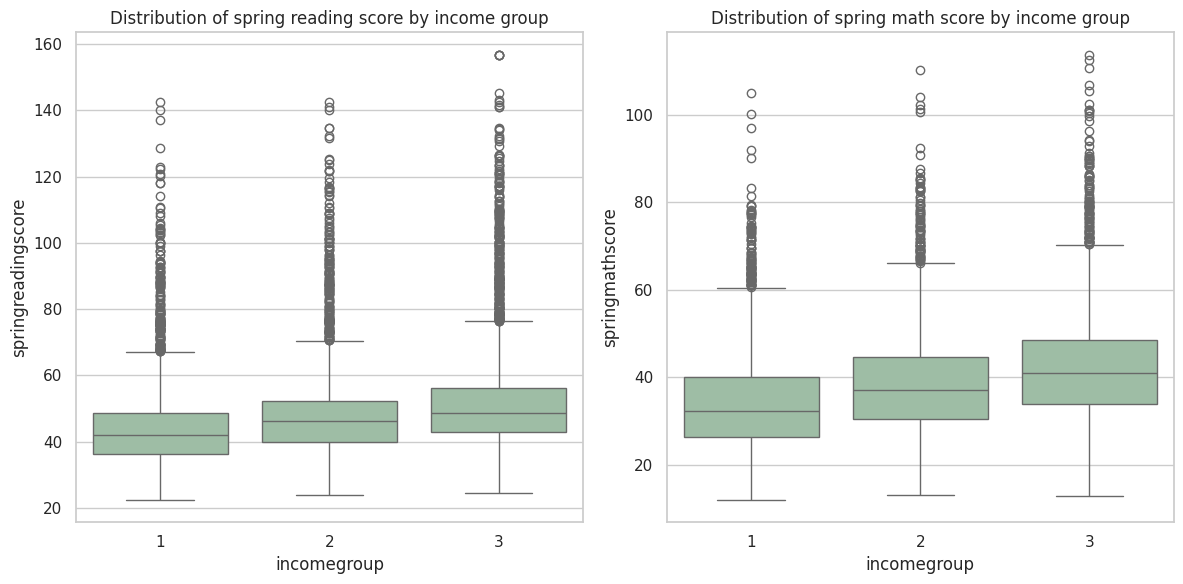

In [7]:
# Visualize the data distribution by Incomegroup, showing only outliers as dots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='incomegroup', y='springreadingscore', data=data, color='#99c2a2')
plt.title('Distribution of spring reading score by income group')

plt.subplot(1, 2, 2)
ax = sns.boxplot(x='incomegroup', y='springmathscore', data=data, color='#99c2a2')
plt.title('Distribution of spring math score by income group')

plt.tight_layout()
plt.show()

# Interpretation of Boxplots:
# - Median scores for reading and math increase from lower to higher income groups.
# - Group 1 displays the widest score range, suggesting greater variability.
# - Numerous outliers indicate extreme scores in both subjects across all groups.
# - Higher income groups have a tighter score distribution, suggesting less variability.


# One-way ANCOVAS functions

In [8]:
# Function to run ANCOVA and print summary
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

def run_ancova(dependent_var, covariate, independent_var, data):
    model = ols(f'{dependent_var} ~ {covariate} + C({independent_var})', data=data).fit()
    ancova_result = sm.stats.anova_lm(model, typ=2).round(3)
    title = f"ANCOVA for {dependent_var} controlling for {covariate}"
    return title, ancova_result, model

In [9]:
# linearity test
import matplotlib.pyplot as plt
import seaborn as sns

def test_linearity(model, data):
    # Get the predicted values and residuals from the model
    predictions = model.predict(data)
    residuals = model.resid

    # Plotting residuals vs. predicted values
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Show plot
    plt.show()


    # Check visually for patterns: residuals should be randomly scattered around zero line


In [10]:
# Normality of residuals test
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def test_normality_of_residuals(model):

    residuals = model.resid

    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(residuals)

    # Histogram of residuals
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.figure(figsize=(6, 4))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')

     # Interpret the results
    if shapiro_p < 0.05:
        hypothesis_statement = "The null hypothesis of normality is rejected; the residuals are not normally distributed."
    else:
        hypothesis_statement = "The null hypothesis of normality is not rejected; the residuals appear to be normally distributed."

    return shapiro_stat, shapiro_p, hypothesis_statement


In [11]:
# Homogeneity of Variances test
import scipy.stats as stats

def test_homogeneity_of_variances(dependent_var, independent_var, data):

    group_data = [data[data[independent_var] == group][dependent_var] for group in data[independent_var].unique()]
    stat, p = stats.levene(*group_data)

    if p < 0.05:
        hypothesis_statement = "The null hypothesis of equal variances is rejected; variances are not equal across groups."
    else:
        hypothesis_statement = "The null hypothesis of equal variances is not rejected; variances are equal across groups."

    return stat, p, hypothesis_statement


In [12]:
# interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_interaction_with_bins(dependent_var, covariate, independent_var, data, num_bins=5):

    # Bin the continuous covariate
    binned_covariate = pd.cut(data[covariate], bins=num_bins, labels=range(1, num_bins + 1))

    # Determine the number of unique levels in the independent variable
    levels = data[independent_var].nunique()

    # Generate a color palette with a distinct color for each level
    colors = plt.cm.viridis(np.linspace(0, 1, levels))

    # Create the interaction plot
    fig = interaction_plot(x=binned_covariate, trace=data[independent_var], response=data[dependent_var], colors=colors)
    plt.title(f'Interaction Plot for {dependent_var} by {independent_var} with Binned {covariate}')
    plt.xlabel(f'Binned {covariate}')
    plt.ylabel(dependent_var)
    plt.show()

In [13]:
# Prepare the data for ANCOVA by including all scores with the income group
ancova_data = data[['fallreadingscore', 'springreadingscore', 'fallmathscore', 'springmathscore',
                    'fallgeneralknowledgescore', 'springgeneralknowledgescore', 'incomegroup']]

# One-way ANCOVA {dependent-spring reading score, independent-income group, cov-spring general knowledge score}

ANCOVA for spring reading score controlling for spring general knowledge score

In [14]:
# Step 1: Run ANCOVA
title, ancova_result, model1 = run_ancova('springreadingscore', 'springgeneralknowledgescore', 'incomegroup', data)
print(title)
print(ancova_result)

ANCOVA for springreadingscore controlling for springgeneralknowledgescore
                                  sum_sq       df         F  PR(>F)
C(incomegroup)                 18661.443      2.0    58.533     0.0
springgeneralknowledgescore   400061.996      1.0  2509.637     0.0
Residual                     1901605.882  11929.0       NaN     NaN


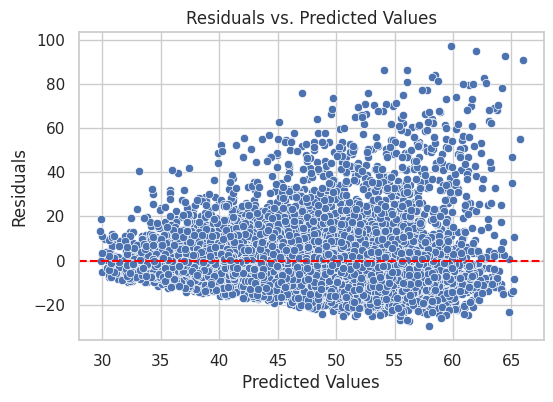

In [15]:
# Step 2: linearity test
test_linearity(model1, data)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.8265702724456787, p-value: 0.0
The null hypothesis of normality is rejected; the residuals are not normally distributed.


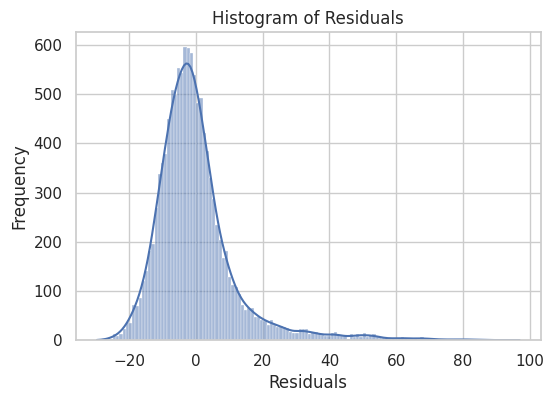

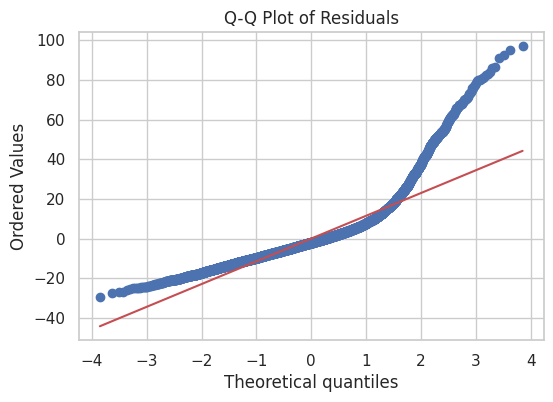

In [16]:
# Step 3: Test Normality of Residuals
shapiro_stat, shapiro_p, hypothesis_statement = test_normality_of_residuals(model1)
print(f"Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {shapiro_p}")
print(hypothesis_statement)

In [17]:
# Step 4: Test Homogeneity of Variances
stat, p, hypothesis_statement = test_homogeneity_of_variances('springreadingscore', 'incomegroup', data)
print(f"Levene's test statistic: {stat}, p-value: {p}")
print(hypothesis_statement)

Levene's test statistic: 39.55282959647881, p-value: 7.570499656193536e-18
The null hypothesis of equal variances is rejected; variances are not equal across groups.


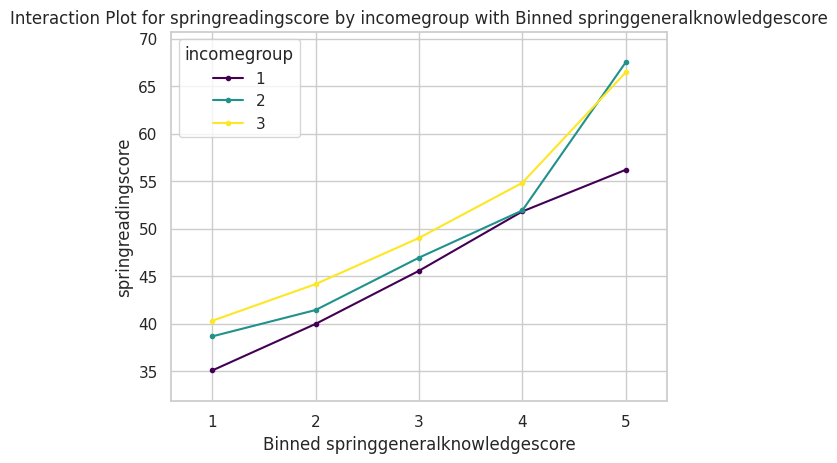

In [18]:
plot_interaction_with_bins('springreadingscore', 'springgeneralknowledgescore', 'incomegroup', data, num_bins=5)

# One-way ANCOVAS{ dependent-spring math score, independent-income group, cov-spring general knowledge score}

In [19]:
# Step 1: Run ANCOVA
title, ancova_result, model2 = run_ancova('springmathscore', 'springgeneralknowledgescore', 'incomegroup', data)
print(title)
print(ancova_result)

ANCOVA for springmathscore controlling for springgeneralknowledgescore
                                  sum_sq       df         F  PR(>F)
C(incomegroup)                 11669.913      2.0    64.830     0.0
springgeneralknowledgescore   504336.297      1.0  5603.517     0.0
Residual                     1073652.115  11929.0       NaN     NaN


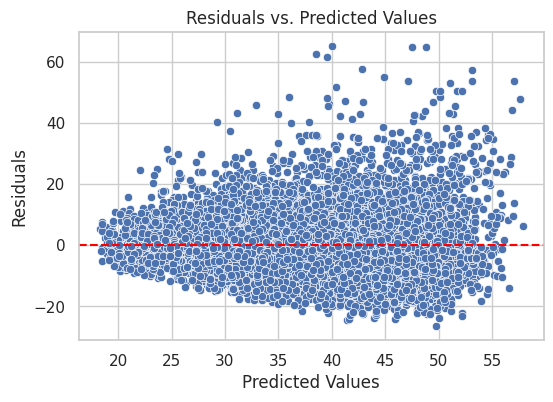

In [20]:
# Step 2: linearity test
test_linearity(model2, data)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.9483227133750916, p-value: 0.0
The null hypothesis of normality is rejected; the residuals are not normally distributed.


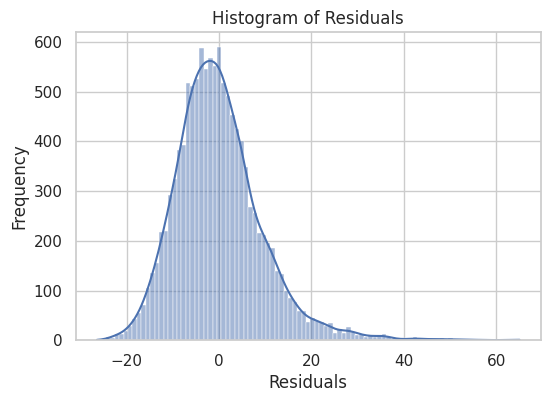

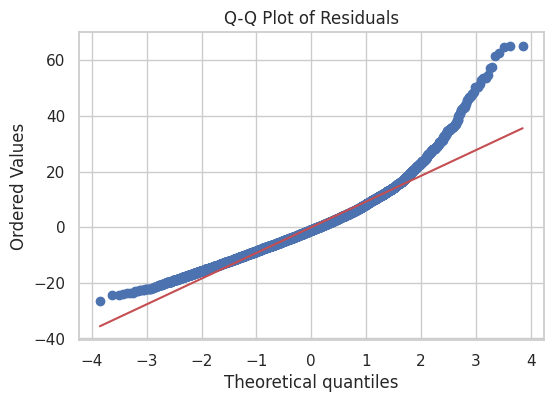

In [21]:
# Step 3: Test Normality of Residuals
shapiro_stat, shapiro_p, hypothesis_statement = test_normality_of_residuals(model2)
print(f"Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {shapiro_p}")
print(hypothesis_statement)

In [22]:
# Step 4: Test Homogeneity of Variances
stat, p, hypothesis_statement = test_homogeneity_of_variances('springmathscore', 'incomegroup', data)
print(f"Levene's test statistic: {stat}, p-value: {p}")
print(hypothesis_statement)

Levene's test statistic: 18.899850238111785, p-value: 6.380804527269148e-09
The null hypothesis of equal variances is rejected; variances are not equal across groups.


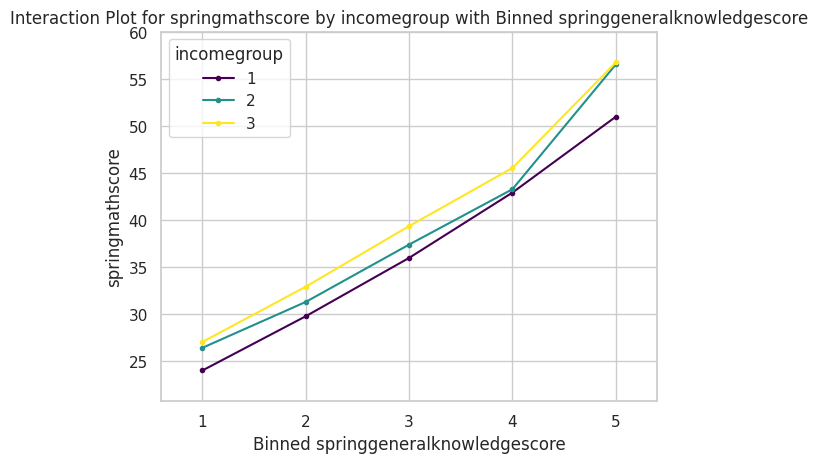

In [23]:
plot_interaction_with_bins('springmathscore', 'springgeneralknowledgescore', 'incomegroup', data, num_bins=5)